In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns

In [199]:
# https://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=122.ICP.M.U2.N.000000.4.ANR

In [200]:
# Settings for sereies key
url = 'https://sdw-wsrest.ecb.europa.eu/service/data/'
headers = {'Accept':'application/json'}

dataflow = 'ICP'  # Index Consumer Prices (ICP)
country_lst = '+'.join(['DE', 'FR', 'IT', 'ES', 'NL', 'PT', 'GR', 'BE', 'AT', 'U2'])
freq = 'M'
start_date = '?startPeriod=2000-01-01'

series_key = dataflow + '/' + freq + '.' + country_lst + '.' 'N.000000.4.ANR' + start_date

In [201]:
# Retrieve data and prepare
r = requests.get('{}{}'.format(url, series_key), headers=headers).json()

date_list = r['structure']['dimensions']['observation'][0]['values']
dates = [date['start'][:10] for date in date_list]
    
areas = [v['name'] for v in r['structure']['dimensions']['series'][1]['values']]

df = pd.DataFrame()

for i, area in enumerate(areas):
    s_key = '0:'+ str(i) + ':0:0:0:0'
    s_list = r['dataSets'][0]['series'][s_key]['observations']
    df[area] = pd.Series([s_list[val][0] for val in sorted(s_list, key=int)])

In [202]:
# Finalize dataframe
df.index = dates
df.index = pd.to_datetime(df.index).strftime("%B %Y")

df = df.rename(columns = {'Euro area (changing composition)' : 'Euro area'})

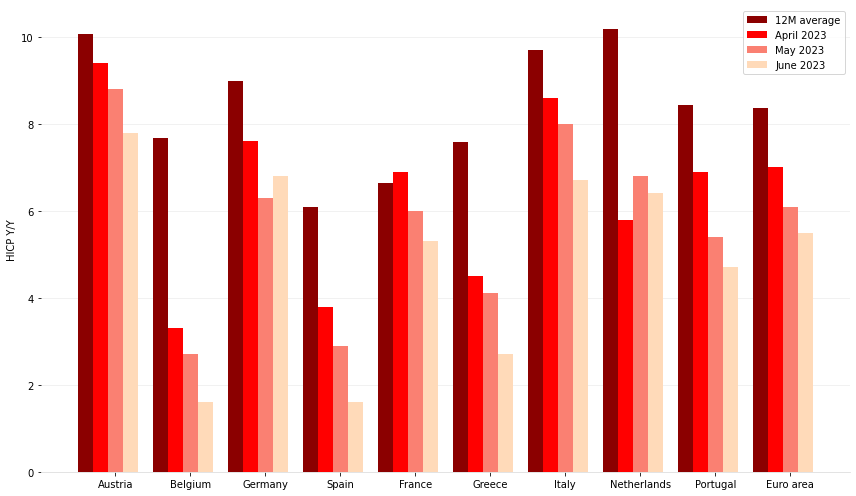

In [203]:
# Create bar chart
plt.rcParams['figure.figsize'] = (12, 7)

fig, ax = plt.subplots()

ax.bar(x-0.4, df.loc[df.index[-12:],:].mean(), width, color = 'darkred')
ax.bar(x-0.2, df.loc[df.index[-3],:], width, color='red')
ax.bar(x, df.loc[df.index[-2],:], width, color='salmon')
ax.bar(x+0.2, df.loc[df.index[-1],:], width, color='peachpuff')

plt.xticks(x, df.columns)
plt.ylabel("HICP Y/Y")
plt.legend(['12M average', df.index[-3], df.index[-2], df.index[-1]])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Make the chart fill out the figure better.
fig.tight_layout()

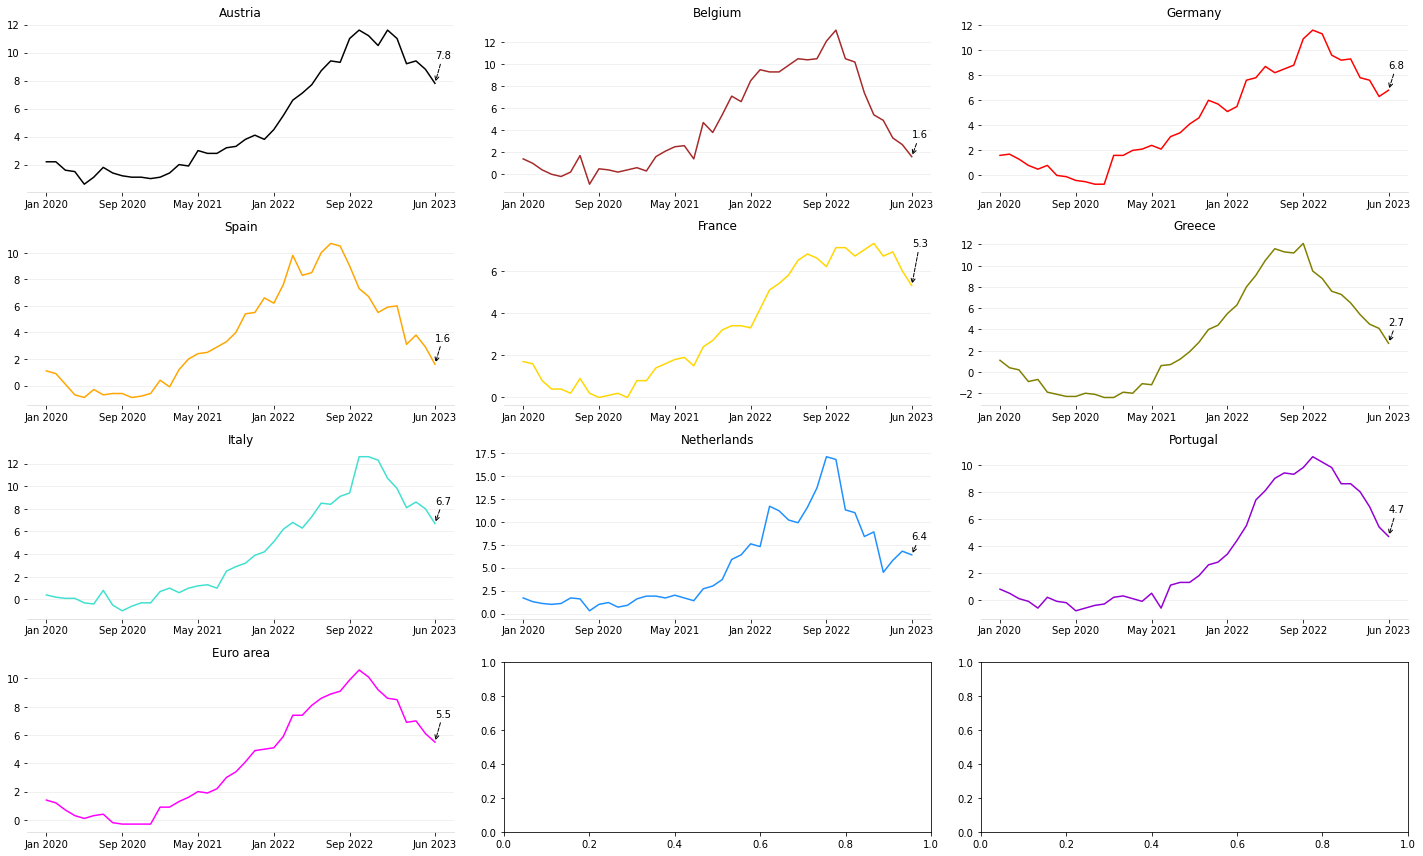

In [204]:
# Initialize some settings
df_2 = df.copy()
df_2.index = pd.to_datetime(df_2.index).strftime("%b %Y")

colors = ['black', 'brown', 'red', 'orange', 'gold', 'olive', 'turquoise', 'dodgerblue', 'darkviolet', 'fuchsia']
color_dict = {df_2.columns[i]: colors[i] for i in range(len(df_2.columns))}

# Generate x ticks and labels
subset_df = df_2.loc['Jan 2020':]
locations = list(np.arange(0, subset_df.shape[0] - 1, 8))

if (subset_df.shape[0] - 1) not in locations:
    locations.remove(locations[-1])
    locations.append(subset_df.shape[0] - 1)

labels = [subset_df.iloc[loc].name for loc in locations]

# Generate subplots
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize=(20, 12))

for country, ax in zip(df_2.columns, ax.ravel()):
    
    subset_df[country].plot(ax=ax, color = color_dict[country])
    
    ax.set_title(country)
    ax.set_xticks(locations, labels)
    ax.annotate(df_2.loc[df_2.index[-1], country], xy = (ax.get_xticks()[-1], df_2.loc[df_2.index[-1], country]),
                xytext = (ax.get_xticks()[-1], df_2.loc[df_2.index[-1], country] + 2),
               arrowprops={'arrowstyle': '->', 'ls': 'dashed'}, va='center')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')

    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)    
    
    
plt.tight_layout()